In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Algerian forest fire cleanned dataset MINE")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
## we dont need Day Month and YEar feature so we are dropping them
## We have to take care of Classes feature becouse it is a categorical feature
## and last we are try to predict FWI (Fire Weather Index)

In [7]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [8]:
df.drop(['day', 'month', 'year'],axis=1, inplace=True)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [11]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [12]:
df["Classes"]=np.where( df["Classes"].str.contains("not fire"),0,1)

In [13]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [14]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,0
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,0
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,0


In [15]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [17]:
## independant and dependant features

x = df.drop("FWI",axis=1)
y = df["FWI"]

In [20]:
x.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [21]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [22]:
## train test split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)

In [23]:
x_train.shape, x_test.shape

((182, 11), (61, 11))

In [25]:
## features selection based on correlation

x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,NaN
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,NaN
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,NaN
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,NaN
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,NaN
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,NaN
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,NaN
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,NaN
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,NaN
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,NaN


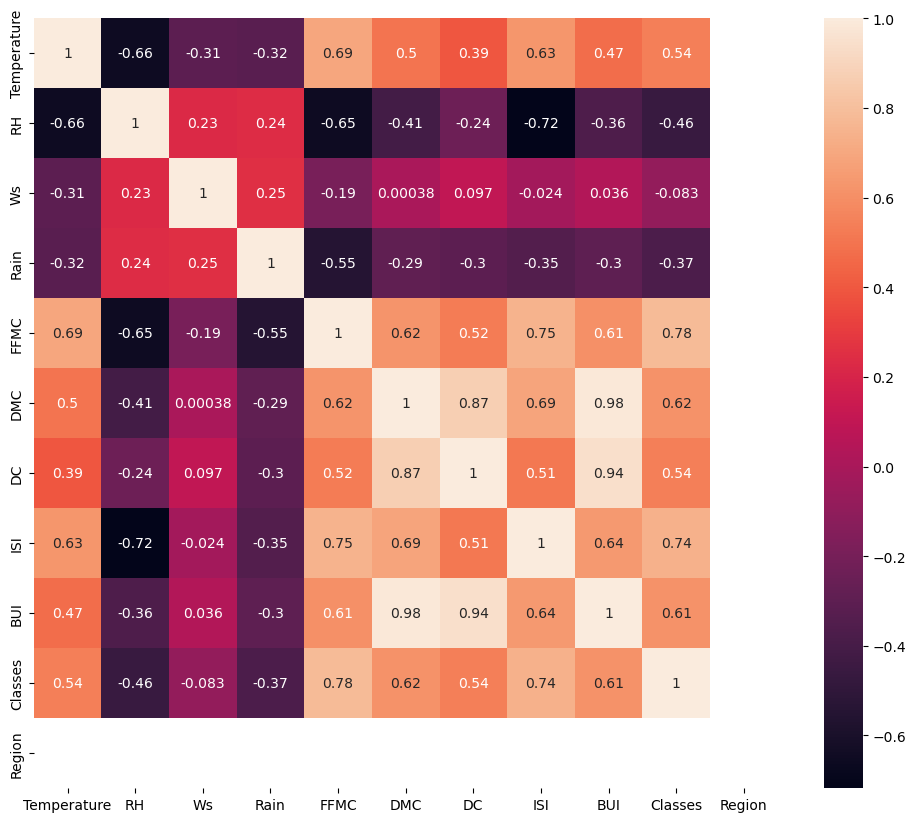

In [26]:
## checking for multicollinearity

plt.figure(figsize=(12, 10))
corr = x_train.corr()
sns.heatmap(corr, annot = True)
plt.show()

In [27]:
## threshold given by the Domain expert
## if correlation is greater than the threshold then these two features are highly correlated so we can drop any one of there two
## highlly correlated means if x increases x also increases or vise versaa

In [29]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
            

In [30]:
## threshold => Domain experties

corr_features = correlation(x_train, 0.85)

In [31]:
corr_features

{'BUI', 'DC'}

In [ ]:
## drop features where correlation is more than 0.85

x_train.drop(corr_features, axis=1, inplace=True)

In [36]:
x_test.drop(corr_features, axis=1, inplace=True)


In [38]:
x_train.shape, x_test.shape

((182, 9), (61, 9))

## Feature Scalling OR Standardization

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [41]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526,  0.        ],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  0.        ],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  0.        ],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526,  0.        ],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  0.        ],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526,  0.        ]])

## Boxplot to understand Effect of standart scaler

<Figure size 640x480 with 0 Axes>

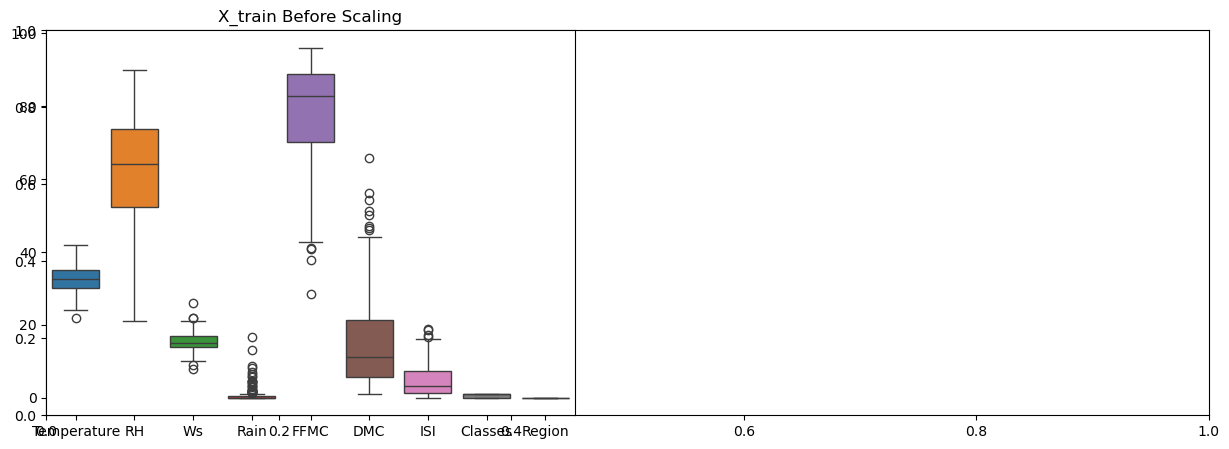

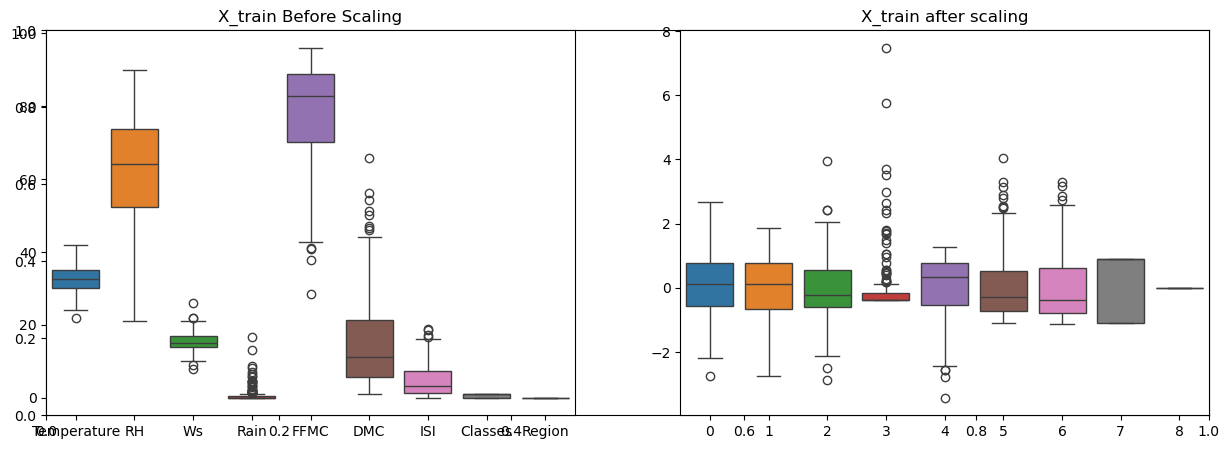

In [44]:
plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.boxplot(data=x_train)
plt.title("X_train Before Scaling")
plt.subplot(1, 2, 2)
sns.boxplot(data=x_train_scaled)
plt.title("X_train after scaling")
plt.show()


## Linear Regression model

Mean Absolute Error = 0.5842707645701559
R2Score = 0.9818991727411215


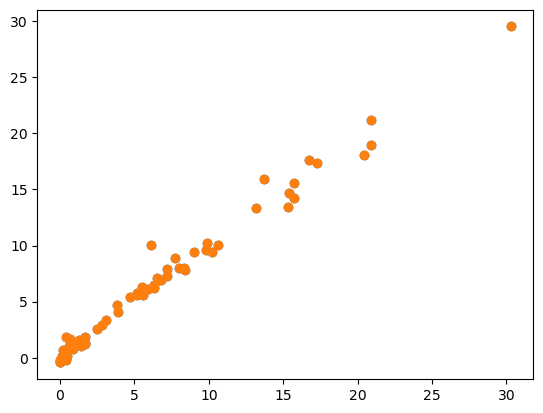

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linearReg = LinearRegression()
linearReg.fit(x_train_scaled,y_train)
y_pred = linearReg.predict(x_test_scaled)
MAE = mean_absolute_error(y_test, y_pred)
R2Score = r2_score(y_test, y_pred)

print("Mean Absolute Error =", MAE)
print("R2Score =", R2Score)

plt.scatter(y_test, y_pred)
plt.show()

## Lasso Regression

Mean Absolute Error = 1.1331759949144085
R2Score = 0.9492020263112388


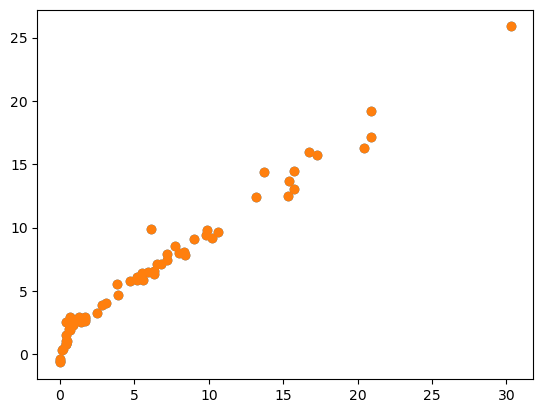

In [54]:
from sklearn.linear_model import Lasso

LassoReg = Lasso()
LassoReg.fit(x_train_scaled,y_train)
y_pred = LassoReg.predict(x_test_scaled)
MAE = mean_absolute_error(y_test, y_pred)
R2Score = r2_score(y_test, y_pred)

print("Mean Absolute Error =", MAE)
print("R2Score =", R2Score)

plt.scatter(y_test, y_pred)
plt.show()

## Cross Validation Lasso

In [56]:
from sklearn.linear_model import LassoCV
LassoCV =LassoCV(cv=5)
LassoCV.fit(x_train_scaled,y_train)



LassoCV(cv=5)

Mean Absolute Error = 0.8264308494715192
R2Score = 0.9710414687002776


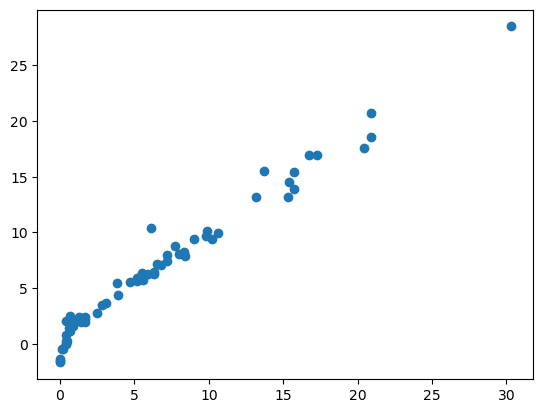

In [57]:
y_pred = LassoCV.predict(x_test_scaled)
MAE = mean_absolute_error(y_test, y_pred)
R2Score = r2_score(y_test, y_pred)

print("Mean Absolute Error =", MAE)
print("R2Score =", R2Score)

plt.scatter(y_test, y_pred)
plt.show()

## Ridge Regression Model

Mean Absolute Error = 0.6006561235951381
R2Score = 0.9813046839382391


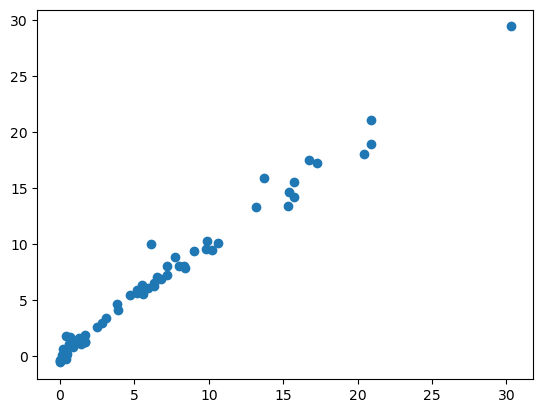

In [58]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridge = Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred = ridge.predict(x_test_scaled)
MAE = mean_absolute_error(y_test, y_pred)
R2Score = r2_score(y_test, y_pred)

print("Mean Absolute Error =", MAE)
print("R2Score =", R2Score)

plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error = 0.8057412365870246
R2Score = 0.9734404349609262


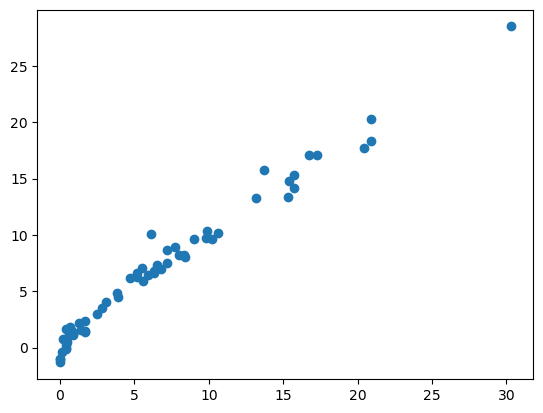

In [59]:
from sklearn.linear_model import RidgeCV
ridgecv =RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)

y_pred = ridgecv.predict(x_test_scaled)
MAE = mean_absolute_error(y_test, y_pred)
R2Score = r2_score(y_test, y_pred)

print("Mean Absolute Error =", MAE)
print("R2Score =", R2Score)

plt.scatter(y_test, y_pred)
plt.show()

In [60]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## Elasticnet Regression

Mean Absolute Error = 1.8822353634896
R2Score = 0.8753460589519703


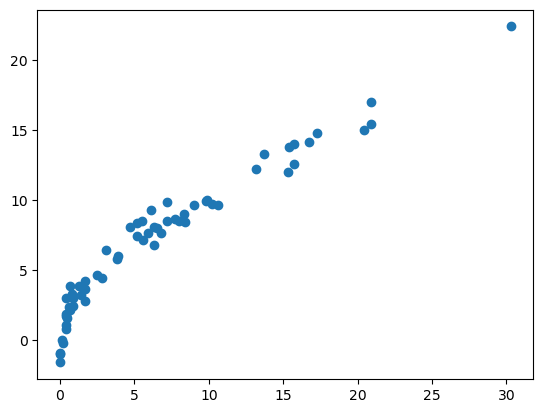

In [61]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elasticnet = ElasticNet()
elasticnet.fit(x_train_scaled,y_train)
y_pred = elasticnet.predict(x_test_scaled)
MAE = mean_absolute_error(y_test, y_pred)
R2Score = r2_score(y_test, y_pred)

print("Mean Absolute Error =", MAE)
print("R2Score =", R2Score)

plt.scatter(y_test, y_pred)
plt.show()

Mean Absolute Error = 0.7245910057301365
R2Score = 0.9769642275571067


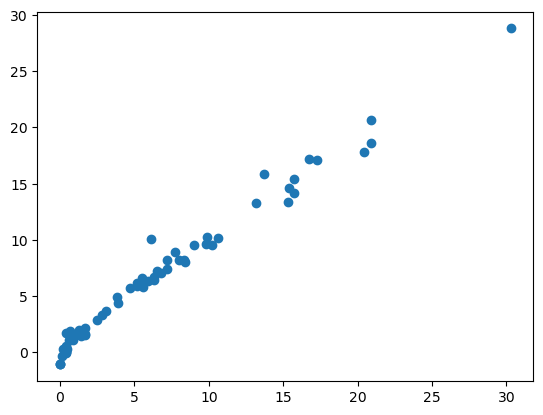

In [62]:
from sklearn.linear_model import ElasticNetCV
elasticnetcv =ElasticNetCV(cv=5)
elasticnetcv.fit(x_train_scaled,y_train)

y_pred = elasticnetcv.predict(x_test_scaled)
MAE = mean_absolute_error(y_test, y_pred)
R2Score = r2_score(y_test, y_pred)

print("Mean Absolute Error =", MAE)
print("R2Score =", R2Score)

plt.scatter(y_test, y_pred)
plt.show()

In [64]:
elasticnetcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

## Pickle the machine learning model, preprocessing model standardsscaler

In [66]:
scaler

StandardScaler()

In [67]:
ridge

Ridge()

In [69]:
import pickle
pickle.dump(scaler,open("scaler.pkl", "wb"))

pickle.dump(ridge,open("ridge.pkl", "wb"))
